<a href="https://colab.research.google.com/github/vaibhavnarute/TE_Task_2_MLSC/blob/main/TE_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd

# Load the dataset
file_path = 'bank-additional-full.csv'
df= pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [173]:
df.shape

(41188, 21)

In [174]:
df.groupby('y').size()

,0
y,
no,36548
yes,4640


In [175]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [176]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [177]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.113


In [178]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [179]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [181]:
print('Number of columns:',len(df.columns))

Number of columns: 22


In [182]:
# for each column
for a in list(df.columns):

    # get a list of unique values
    n = df[a].unique()

    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

**Key Observations:**


 * From the output of the code, we can see that same amount of categorical and numeric values in the columns.

* age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed are numerical variables.

* All the data inputted are non-null values, meaning that we have a value for every column.

* Output (y) has two values: "yes" and "no".



**Feature Engineering**

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data for results in machine learning algorithms.In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.



**Numerical Features**

There are some numerical data

In [183]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [184]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


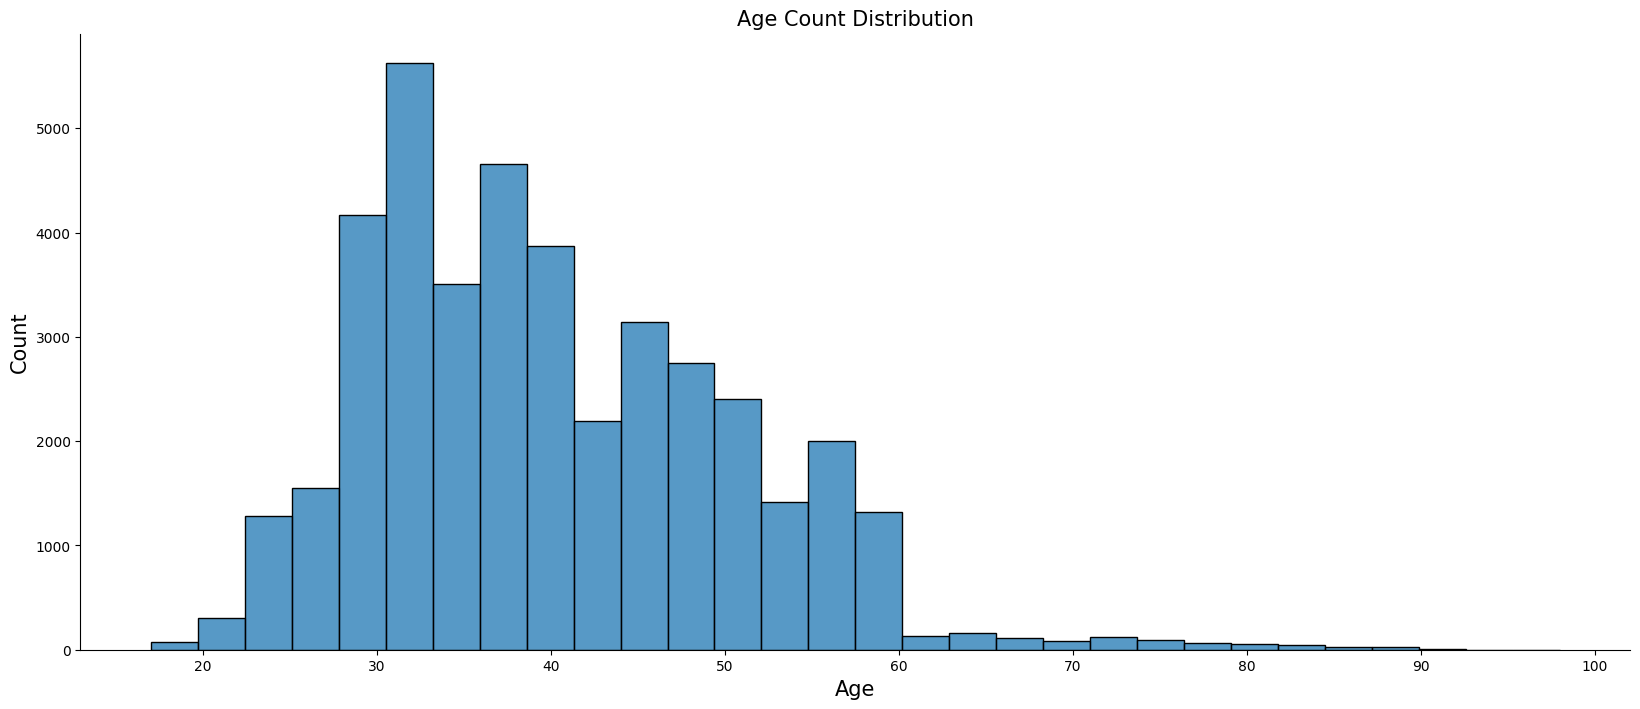

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and cols_num are already defined
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

# Plot a histogram for the age distribution
sns.histplot(df['age'], bins=30, kde=False, ax=ax)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

plt.show()


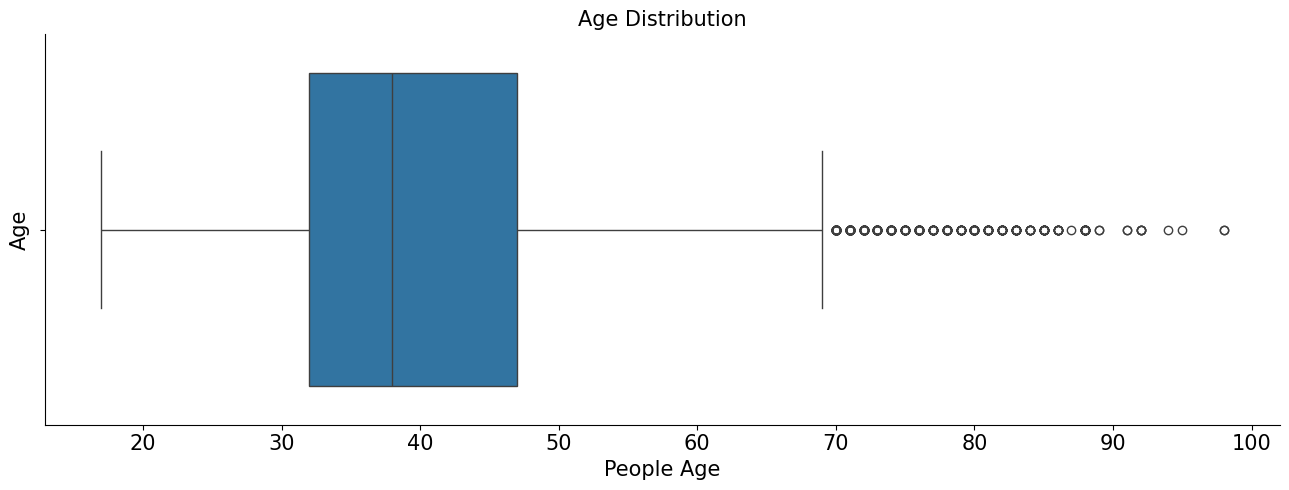

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Assuming df and cols_num are already defined
fig, ax = plt.subplots(figsize=(13, 5))

# Boxplot
sns.boxplot(x='age', data=df[cols_num], orient='v', ax=ax)
ax.set_xlabel('People Age', fontsize=15)
ax.set_ylabel('Age', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
ax.tick_params(labelsize=15)

sns.despine()

plt.tight_layout()
plt.show()


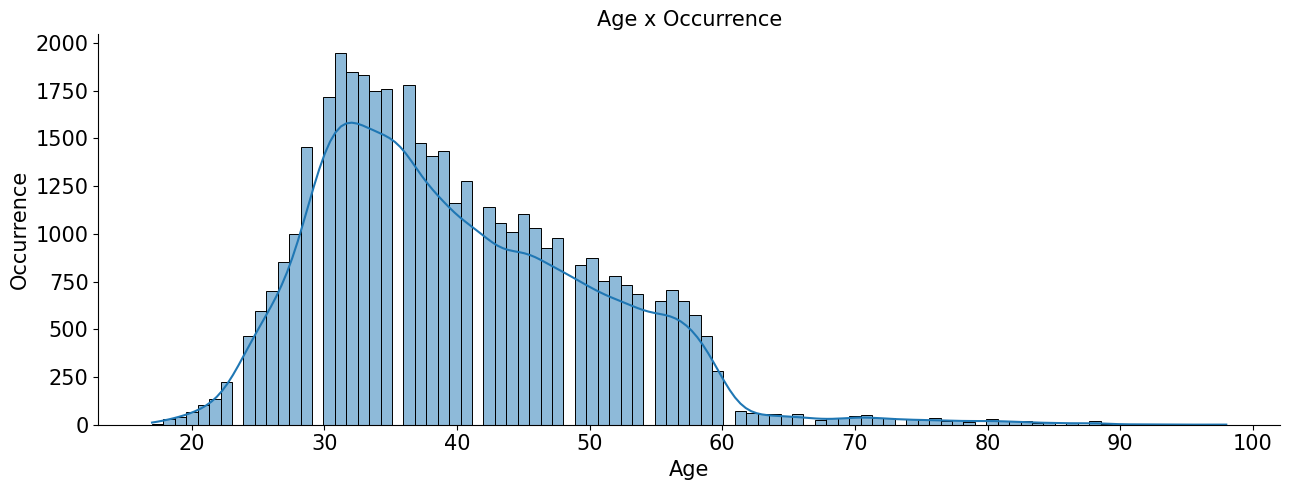

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Assuming df and cols_num are already defined
fig, ax2 = plt.subplots(figsize=(13, 5))

# Distribution plot
sns.histplot(df[cols_num]['age'], kde=True, ax=ax2)  # sns.distplot is deprecated
sns.despine(ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age x Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


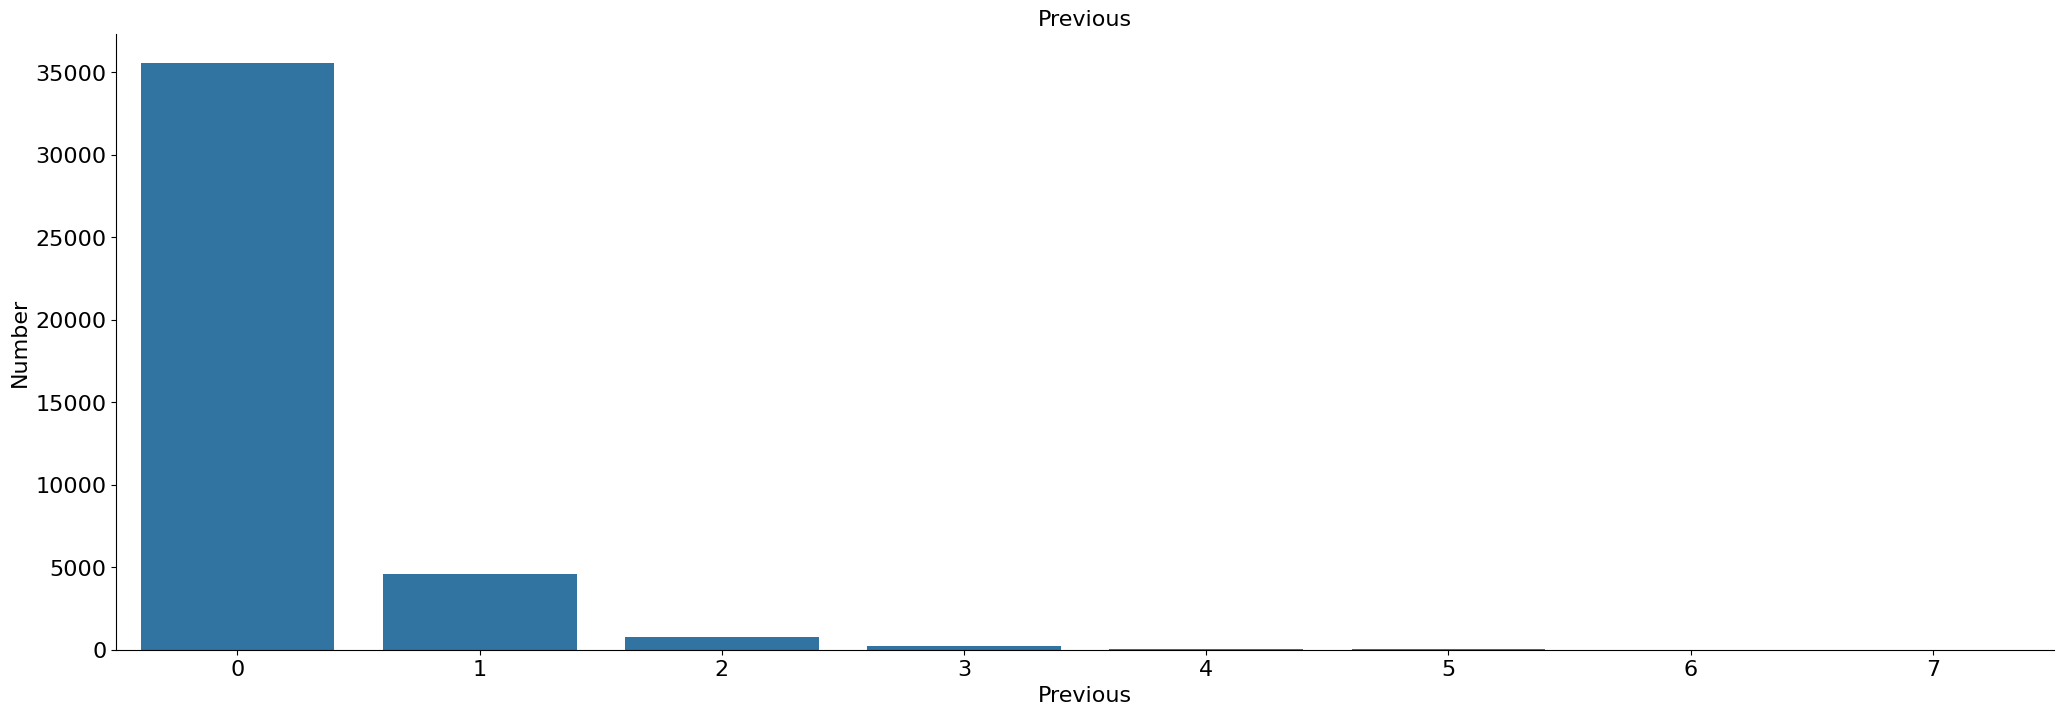

In [188]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

For the emp.var.rate

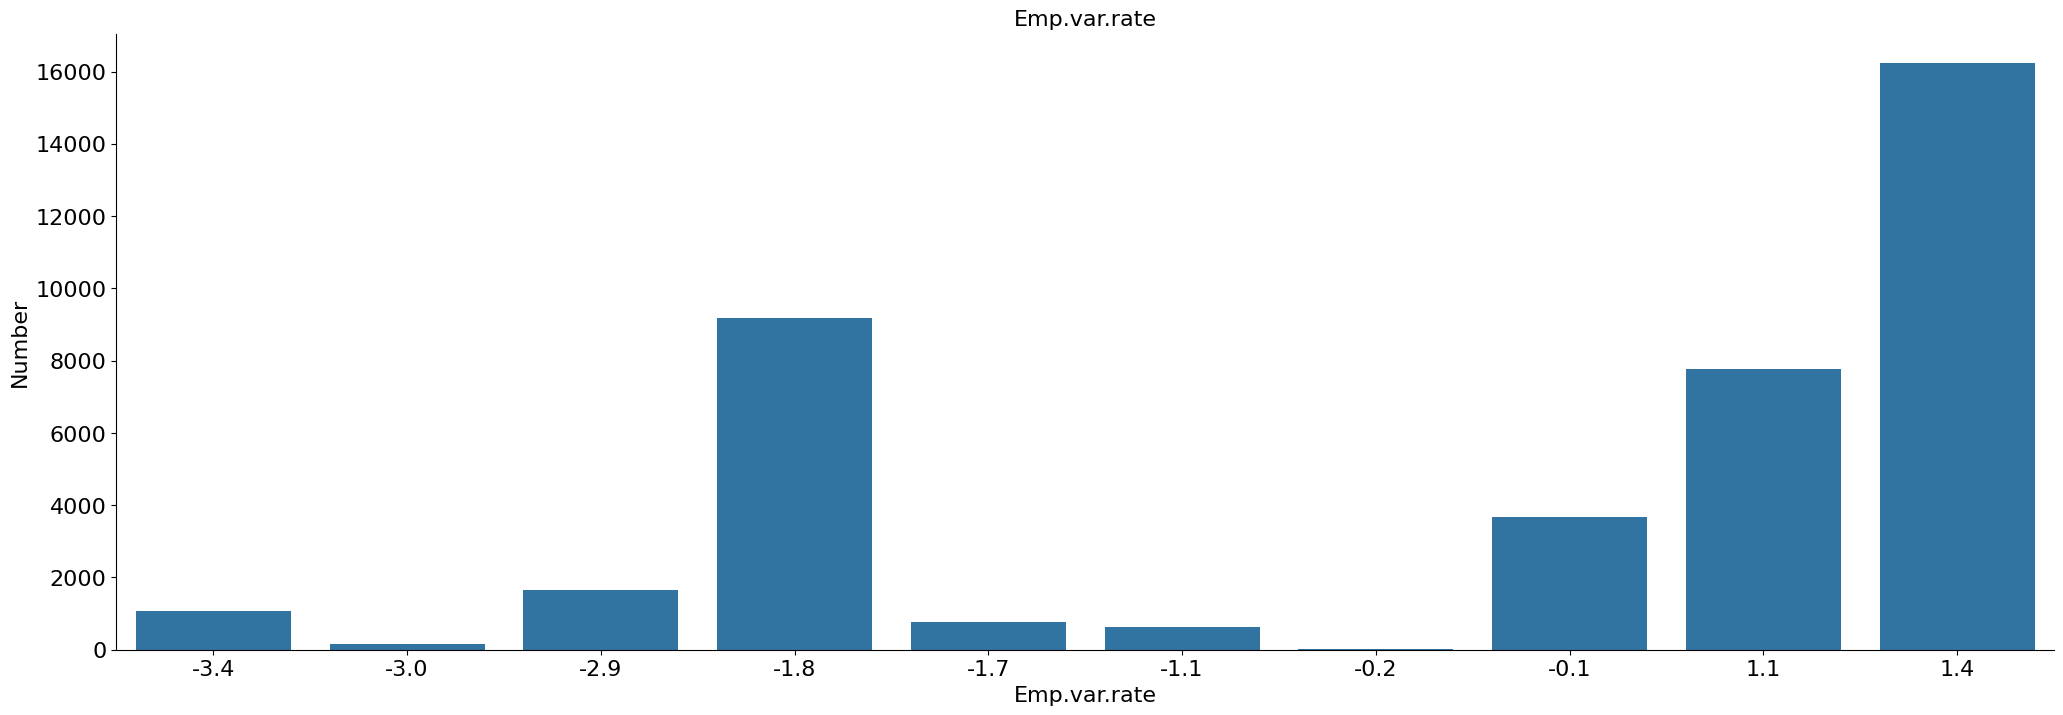

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

For Cons.conf.idx

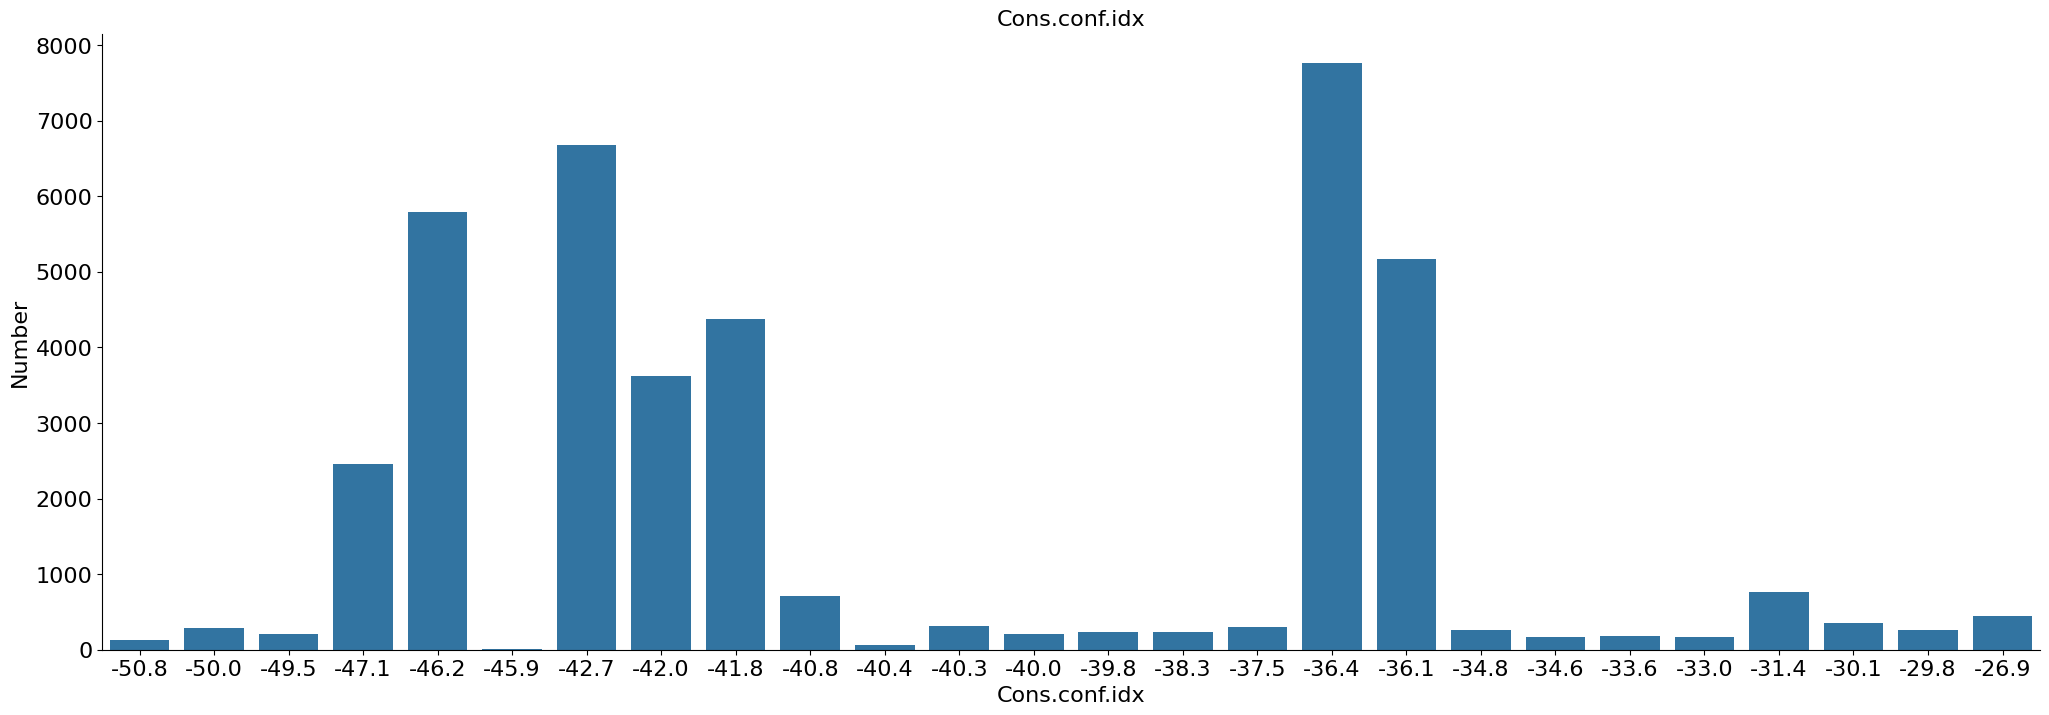

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'cons.conf.idx', data = df[cols_num])
ax.set_xlabel('Cons.conf.idx', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Cons.conf.idx', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

Done for the numerical value

**Let's check if there are any missing values in the numerical data.**

In [191]:
df[cols_num].isnull().sum()

,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
nr.employed,0
age,0
euribor3m,0


**Categorical Features**

  Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, so we use a technique called one-hot encoding



In [192]:
cols_cat = ['job', 'marital',
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

Checking for missing value

In [193]:
df[cols_cat].isnull().sum()

,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
poutcome,0


**One-Hot Encoding**

It is a Technique to convert catagorical features into the Numbers. It create a new column for each unique value in that column,The value of the column is 1 if the sample has that unique value else it is 0.

In [194]:
cols_cat = ['job', 'marital',
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


**Graphical Representation of Categorical Features**

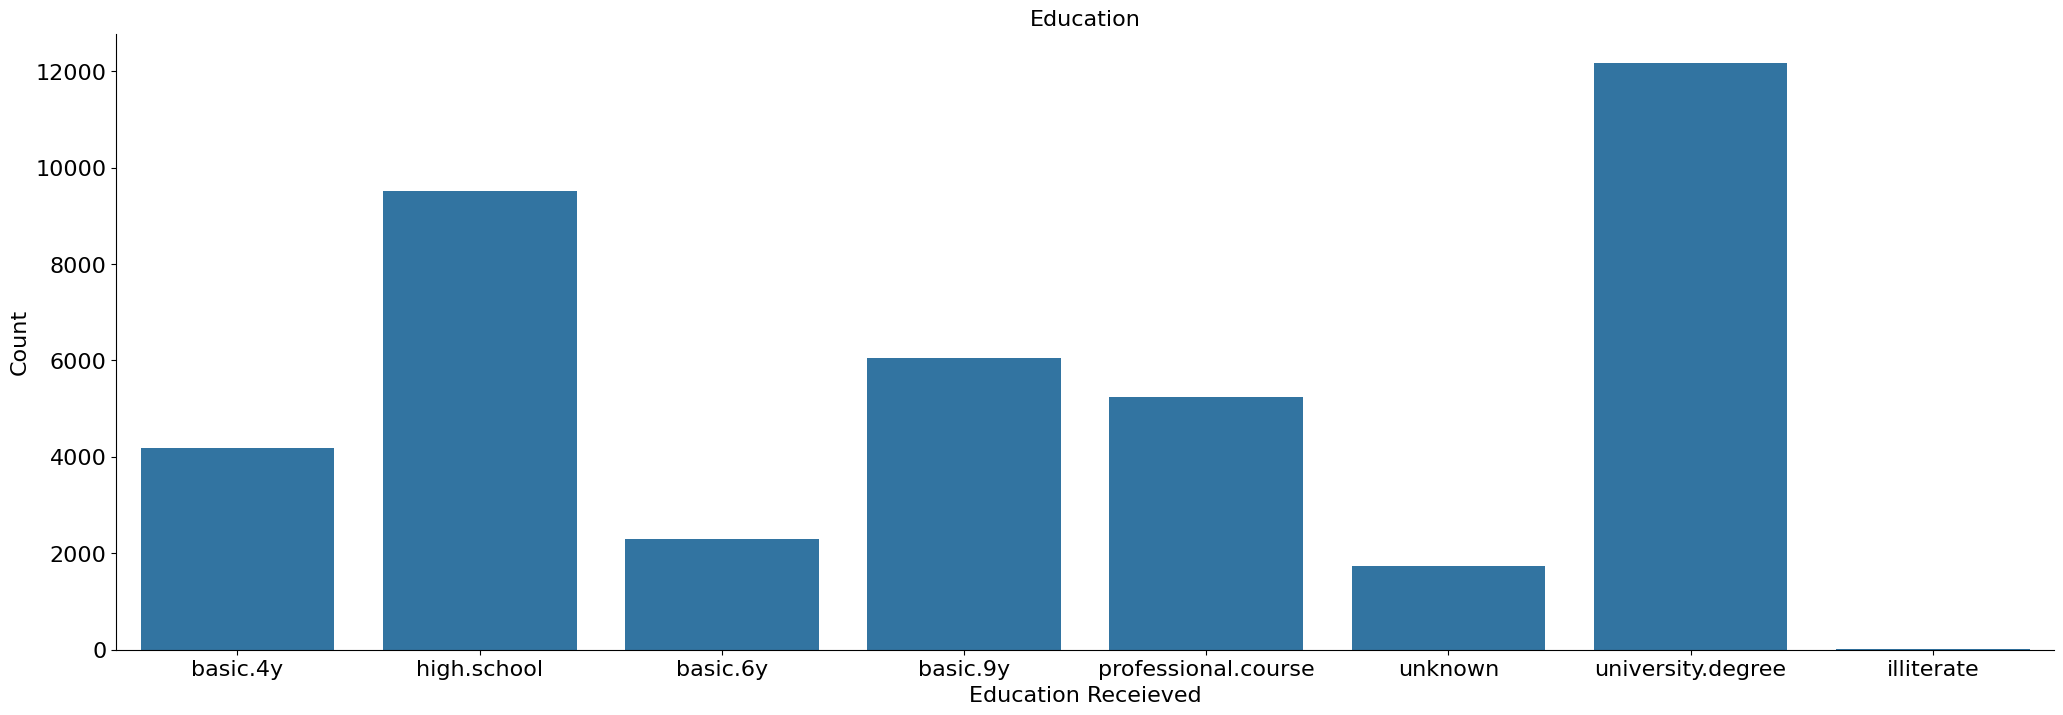

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

Marital Status

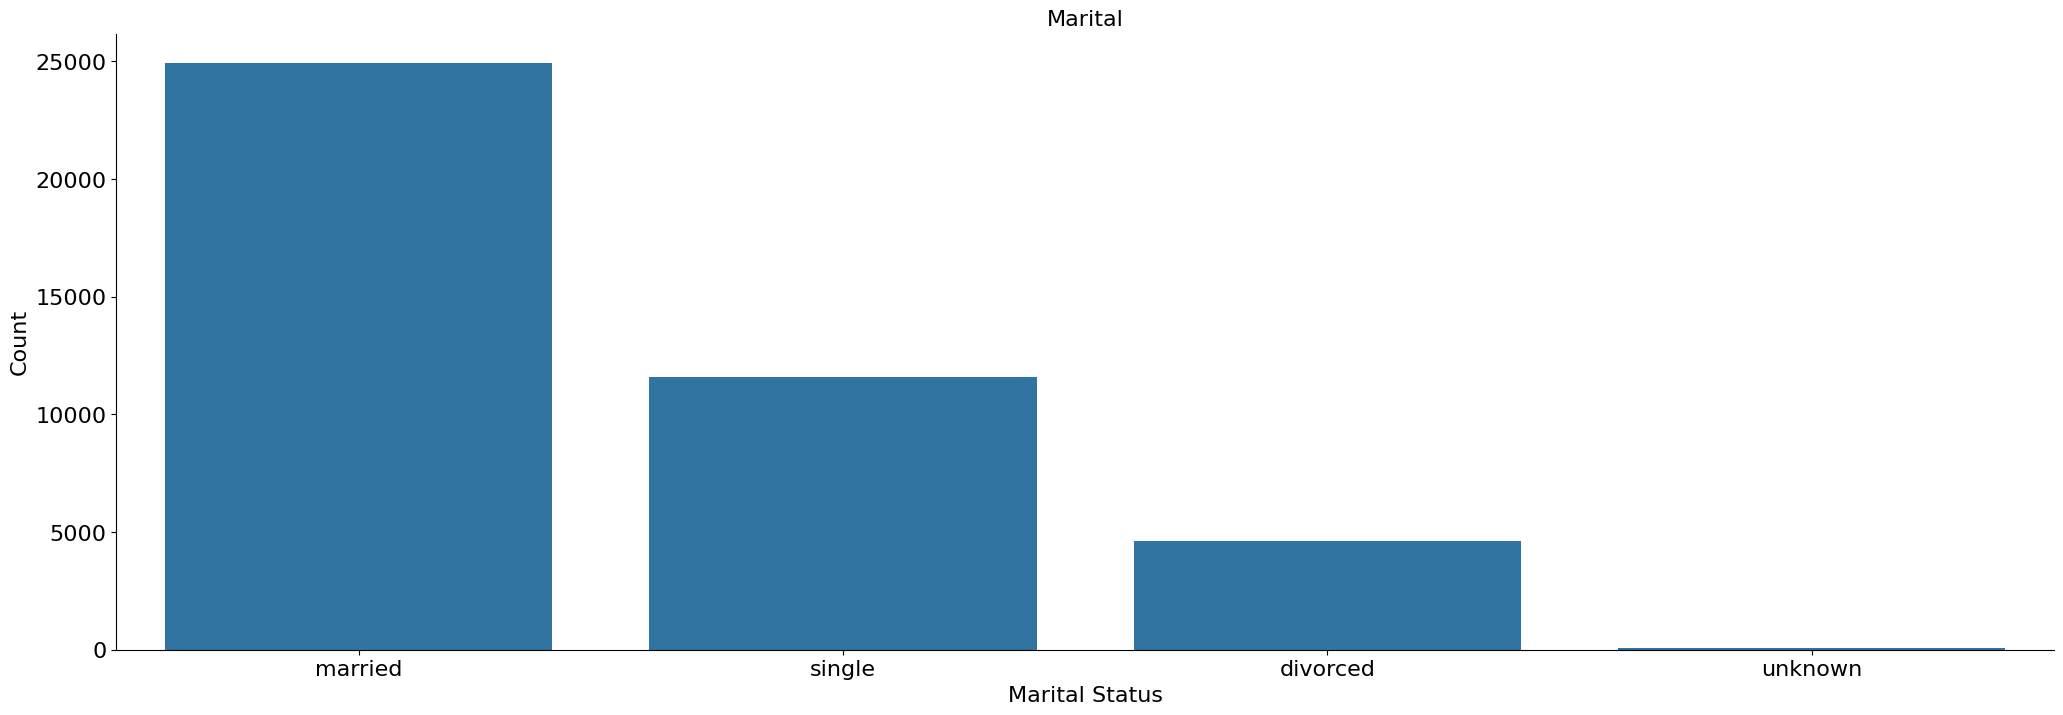

In [196]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

Job

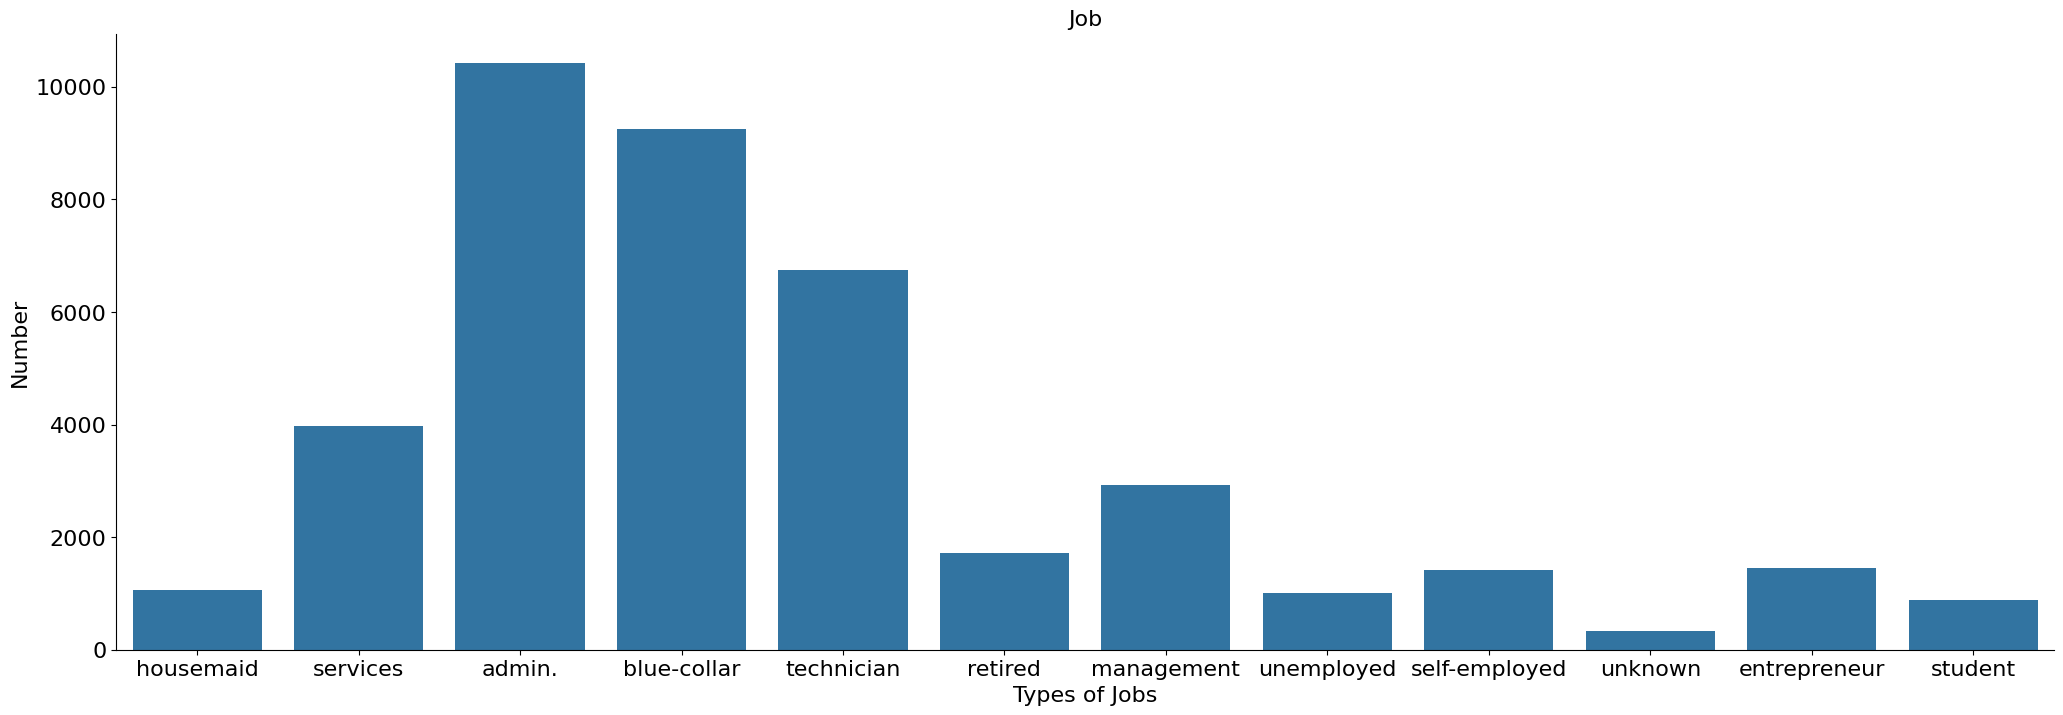

In [197]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

Previous Marketing Campaign Outcome

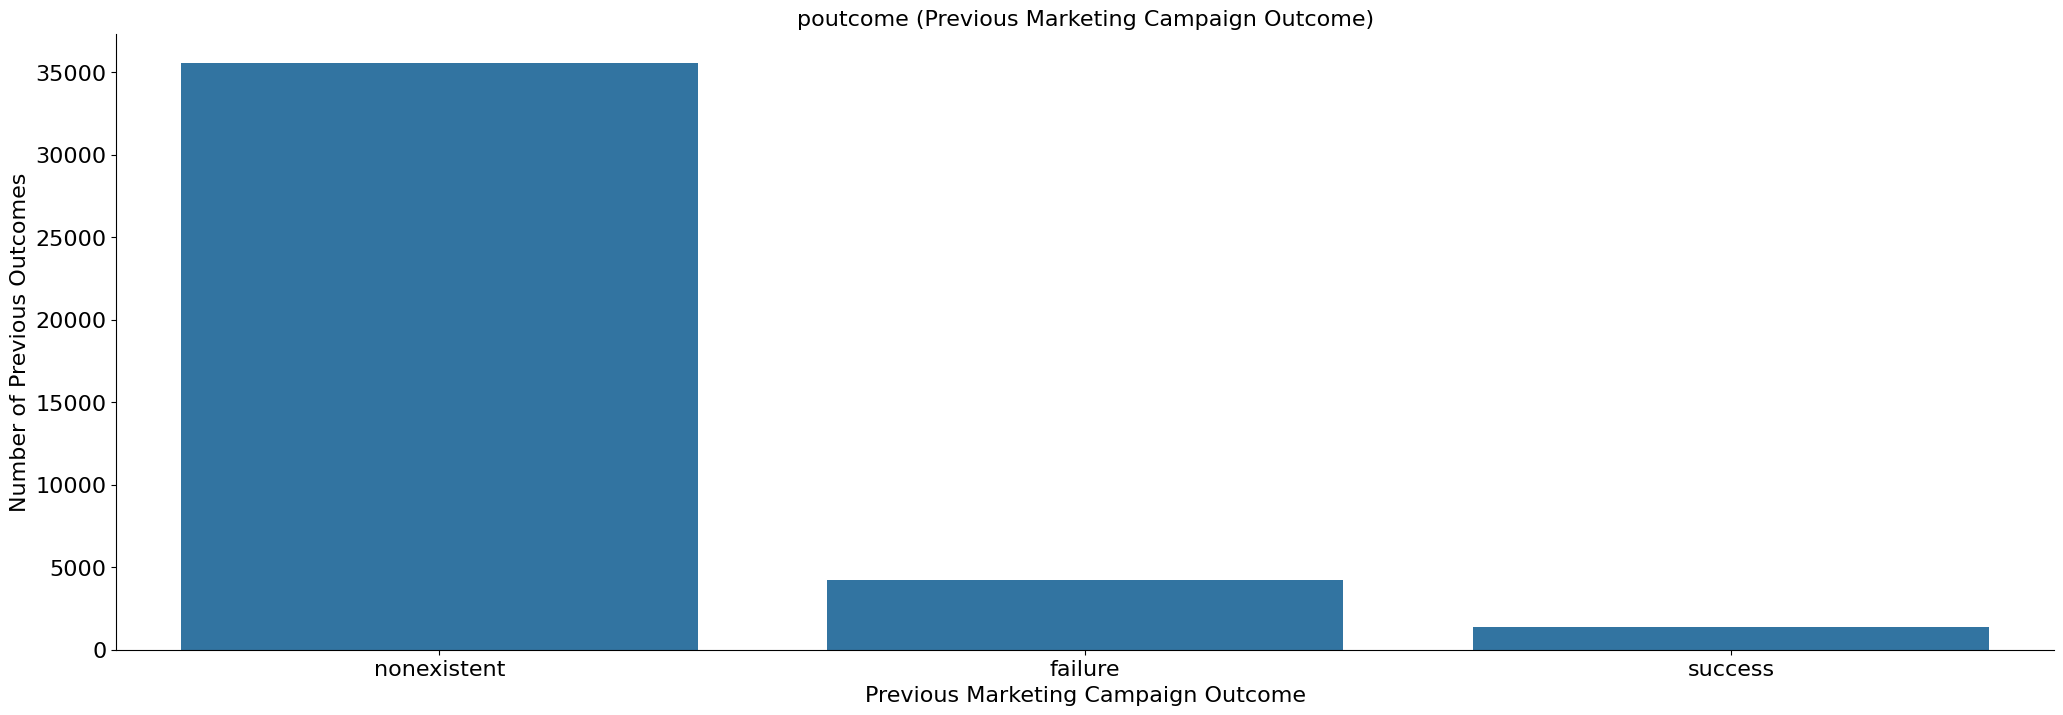

In [198]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

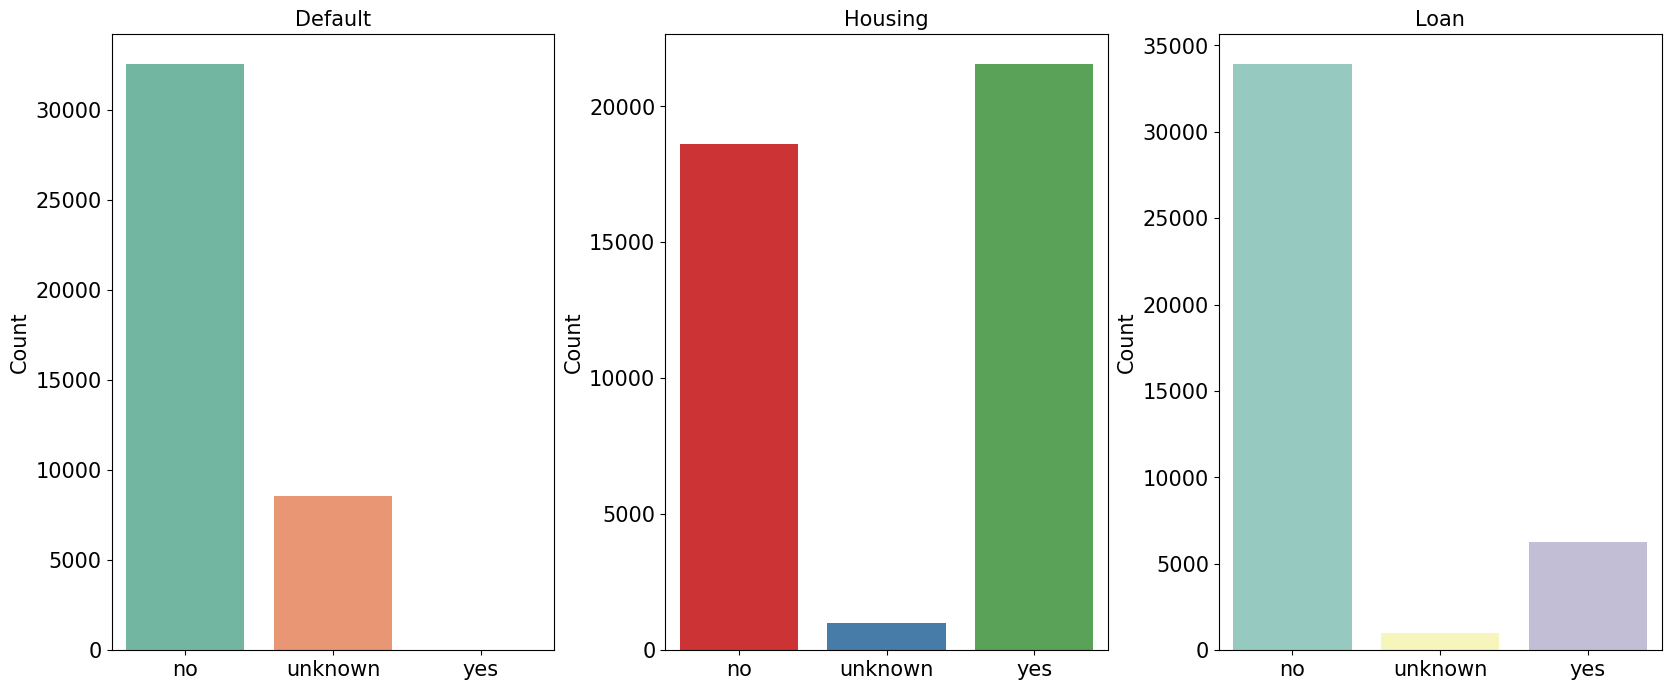

In [199]:

# Assuming data and cols_cat are already defined
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Countplot for 'default' with colors
sns.countplot(x='default', data=df[cols_cat], ax=ax1, order=['no', 'unknown', 'yes'], palette='Set2')
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Countplot for 'housing' with colors
sns.countplot(x='housing', data=df[cols_cat], ax=ax2, order=['no', 'unknown', 'yes'], palette='Set1')
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Countplot for 'loan' with colors
sns.countplot(x='loan', data=df[cols_cat], ax=ax3, order=['no', 'unknown', 'yes'], palette='Set3')
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.show()


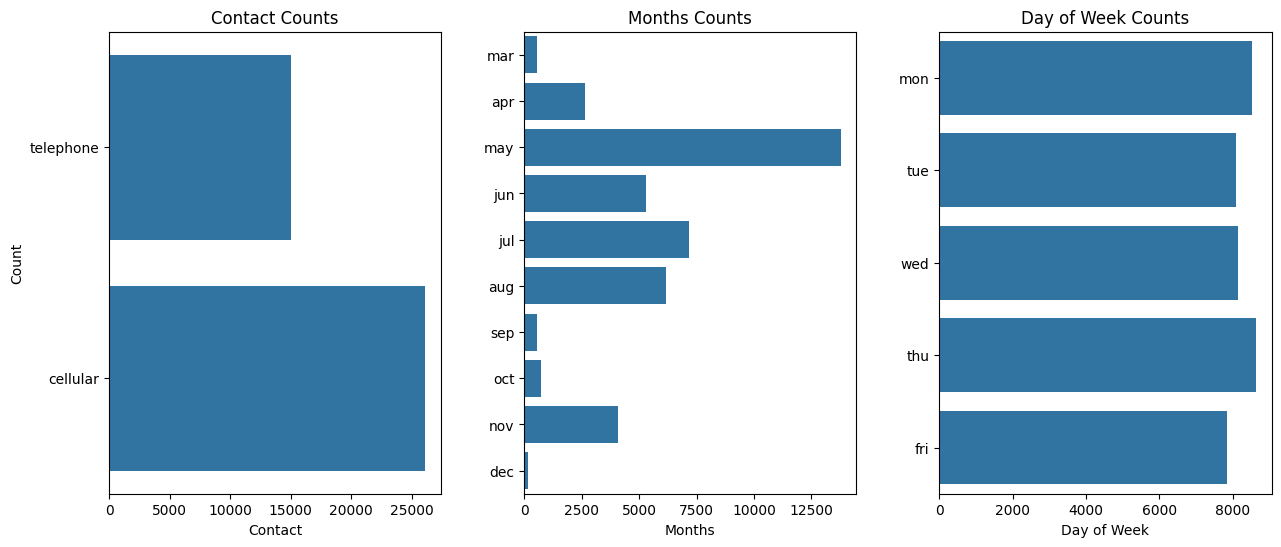

In [200]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

to add the one-hot encoding columns to the dataframe, we use the concat function. axis = 1 is used to add the columns

In [201]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [202]:
cols_all_cat=list(cols_new_cat.columns)

In [203]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


**Summary of Features Engineering**

In [204]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


In [205]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

,0
campaign,0
month_dec,0
default_no,0
default_unknown,0
default_yes,0
housing_no,0
housing_unknown,0
housing_yes,0
loan_no,0
loan_unknown,0


In [206]:
cols_input = cols_num + cols_all_cat

In [207]:
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [208]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [209]:
len(cols_input)

62

In [210]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,False,...,False,False,True,False,False,False,False,True,False,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,False,...,False,False,True,False,False,False,False,True,False,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,False,...,False,False,True,False,False,False,False,True,False,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,True,...,False,False,True,False,False,False,False,True,False,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,False,...,False,False,True,False,False,False,False,True,False,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,False,...,False,False,True,False,False,False,False,True,False,0


**Building Training, Validation & Test Samples**

we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

In this project, we will split into 70% train, 15% validation, and 15% test.

In [211]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

30% of the validation and test samples:

In [212]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


Split into test and validation samples by 50% which makes 15% of test and 15% of validation samples

In [213]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

Use the rest of the data for the training samples

In [214]:
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [215]:
# check the prevalence of each
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 6178):0.114
Valid prevalence(n = 6178):0.113
Train all prevalence(n = 28832):0.112


We need to balance the data set because if we use the training data as the predictive model the accuracy is going to be very high because we haven't caught any of the y output which states whether a person will buy a term deposit or not. There are more negatives than positive so the predictive models assigns negatives to much of the samples. Creating a balance sheet will allow 50% of the samples to be both positive and negative.

In [216]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 6472):0.500


In [217]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid balanced prevalence(n = 1398):0.500


In [218]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Test balanced prevalence(n = 1410):0.500


All 4 dataframes were saved intto csv and the cols_input

In [219]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

Saving cols_input too with a package called pickle

In [220]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Any missing values were filled with the mean value

In [221]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'

    # replace the mean
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

The mean value from the training data:

In [222]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

Loaded the means

In [223]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.552442
2,pdays,962.352456
3,previous,0.173037
4,emp.var.rate,0.078278


In [224]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [225]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (28832, 62)
Training shapes: (6472, 62) (6472,)
Validation shapes: (1398, 62) (1398,)


Created a scalar, saved it, and scaled the X matrices

In [226]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [227]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [228]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

**Model Selection**

This section allows us to test various machine learning algorithm to see how our independent variables accurately predit our dependent y output variable. We will then select the best model based on performance on the validation set. We will utilize the following functions to evaluate the performance of the model.

In [229]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)

    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [230]:
thresh = 0.5

**Model Selection: baseline models**

**K nearest neighbors (KNN)**

K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure.

In [231]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [232]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.797
accuracy:0.734
recall:0.604
precision:0.817
specificity:0.858
prevalence:0.500
f1:0.694
 
Validation:
AUC:0.779
accuracy:0.741
recall:0.601
precision:0.835
specificity:0.878
prevalence:0.500
f1:0.699
 


**Logistic Regression**

Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables

In [233]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [234]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.797
accuracy:0.744
recall:0.633
precision:0.815
specificity:0.856
prevalence:0.500
f1:0.712
 
Validation:
AUC:0.798
accuracy:0.747
recall:0.632
precision:0.822
specificity:0.863
prevalence:0.500
f1:0.715
 


Naive Bayes

Naive Bayes assumes that all variables in the dataset are independent of each other. Meaning that there are no dependent variables or output.

In [235]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [236]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.771
accuracy:0.693
recall:0.492
precision:0.822
specificity:0.893
prevalence:0.500
f1:0.615
 
Validation:
AUC:0.780
accuracy:0.702
recall:0.496
precision:0.844
specificity:0.908
prevalence:0.500
f1:0.625
 


**Decision Tree Classifier**

Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer

In [237]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [238]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.864
accuracy:0.784
recall:0.668
precision:0.871
specificity:0.899
prevalence:0.500
f1:0.756
 
Validation:
AUC:0.748
accuracy:0.720
recall:0.611
precision:0.781
specificity:0.823
prevalence:0.500
f1:0.685
 


**Gradient Boosting Classifier**

Boosting is a technique that builds a new decision tree algorithm that focuses on the errors on the dataset to fix them. This learns the whole model in other to fix it and improve the prediction of the model

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [240]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.900
accuracy:0.820
recall:0.766
precision:0.860
specificity:0.875
prevalence:0.500
f1:0.810
 
Validation:
AUC:0.777
accuracy:0.721
recall:0.684
precision:0.739
specificity:0.758
prevalence:0.500
f1:0.710
 


**Analyze results baseline models**

Let's make a dataframe with these results and plot the outcomes using a package called seaborn - making a dataframe with the results of all the baseline models and plot the outcomes

In [241]:
import pandas as pd

# Assuming you have already computed the necessary metrics for the specified algorithms
df_results = pd.DataFrame({
    'classifier': ['KNN', 'KNN', 'LR', 'LR', 'NB', 'NB', 'DT', 'DT', 'GB', 'GB'],
    'data_set': ['train', 'valid'] * 5,
    'auc': [
        knn_train_auc, knn_valid_auc,
        lr_train_auc, lr_valid_auc,
        nb_train_auc, nb_valid_auc,
        tree_train_auc, tree_valid_auc,
        gbc_train_auc, gbc_valid_auc
    ],
    'accuracy': [
        knn_train_accuracy, knn_valid_accuracy,
        lr_train_accuracy, lr_valid_accuracy,
        nb_train_accuracy, nb_valid_accuracy,
        tree_train_accuracy, tree_valid_accuracy,
        gbc_train_accuracy, gbc_valid_accuracy
    ],
    'recall': [
        knn_train_recall, knn_valid_recall,
        lr_train_recall, lr_valid_recall,
        nb_train_recall, nb_valid_recall,
        tree_train_recall, tree_valid_recall,
        gbc_train_recall, gbc_valid_recall
    ],
    'precision': [
        knn_train_precision, knn_valid_precision,
        lr_train_precision, lr_valid_precision,
        nb_train_precision, nb_valid_precision,
        tree_train_precision, tree_valid_precision,
        gbc_train_precision, gbc_valid_precision
    ],
    'specificity': [
        knn_train_specificity, knn_valid_specificity,
        lr_train_specificity, lr_valid_specificity,
        nb_train_specificity, nb_valid_specificity,
        tree_train_specificity, tree_valid_specificity,
        gbc_train_specificity, gbc_valid_specificity
    ],
    'f1': [
        knn_train_f1, knn_valid_f1,
        lr_train_f1, lr_valid_f1,
        nb_train_f1, nb_valid_f1,
        tree_train_f1, tree_valid_f1,
        gbc_train_f1, gbc_valid_f1
    ]
})

# Display the DataFrame
print(df_results)


  classifier data_set       auc  accuracy    recall  precision  specificity  \
0        KNN    train  0.796956  0.734085  0.603832   0.816548     0.858158   
1        KNN    valid  0.779397  0.741059  0.600858   0.834990     0.878398   
2         LR    train  0.796603  0.744438  0.632880   0.814638     0.855995   
3         LR    valid  0.798059  0.747496  0.632332   0.821561     0.862661   
4         NB    train  0.771106  0.692522  0.491656   0.821798     0.893387   
5         NB    valid  0.779663  0.702432  0.496423   0.844282     0.908441   
6         DT    train  0.864211  0.784456  0.667800   0.871020     0.898640   
7         DT    valid  0.748045  0.719599  0.610873   0.780622     0.822604   
8         GB    train  0.899603  0.820457  0.765760   0.859820     0.875155   
9         GB    valid  0.777268  0.721030  0.683834   0.738794     0.758226   

         f1  
0  0.694262  
1  0.698835  
2  0.712348  
3  0.714632  
4  0.615236  
5  0.625225  
6  0.755991  
7  0.685393  
8  0

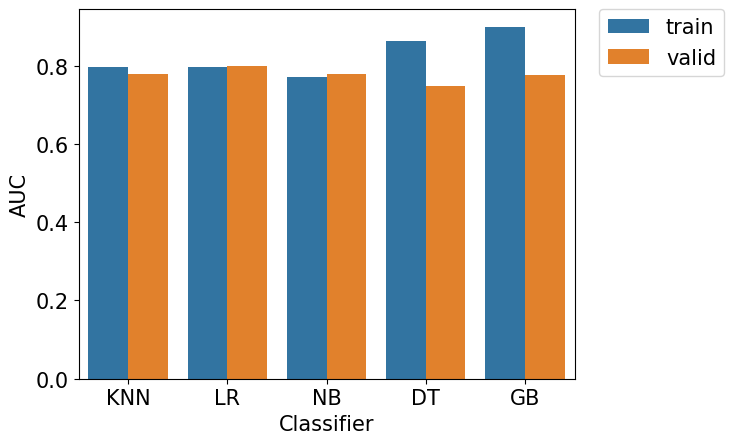

In [242]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [245]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

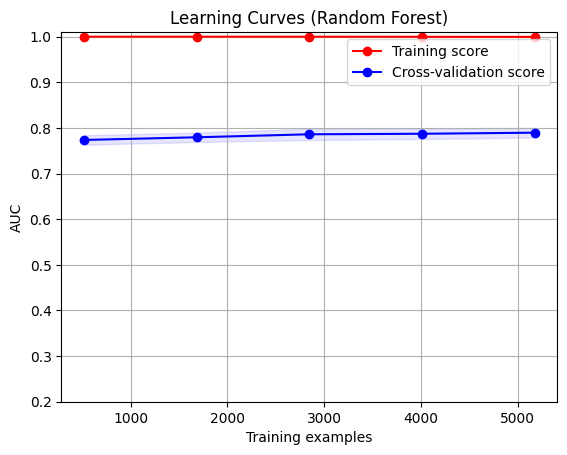

In [246]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)



In [248]:
feature_importances

,importance
cons.price.idx,0.948431
euribor3m,0.487498
month_aug,0.215945
nr.employed,0.197676
month_mar,0.182496
...,...
month_jun,-0.129599
contact_telephone,-0.132556
month_may,-0.179712
pdays,-0.226318


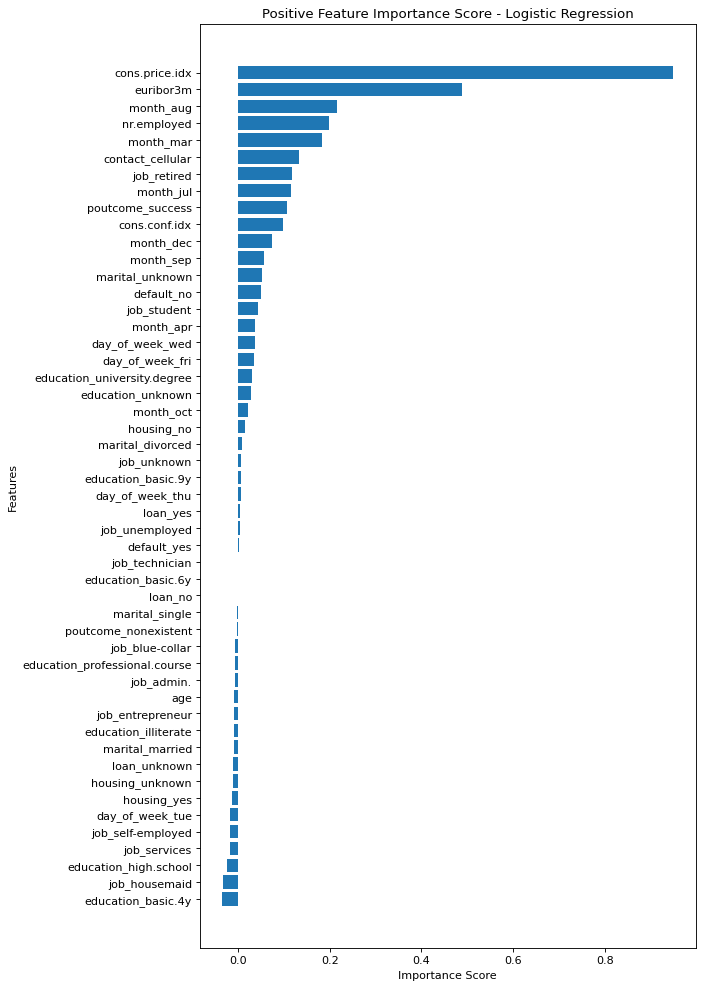

In [249]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

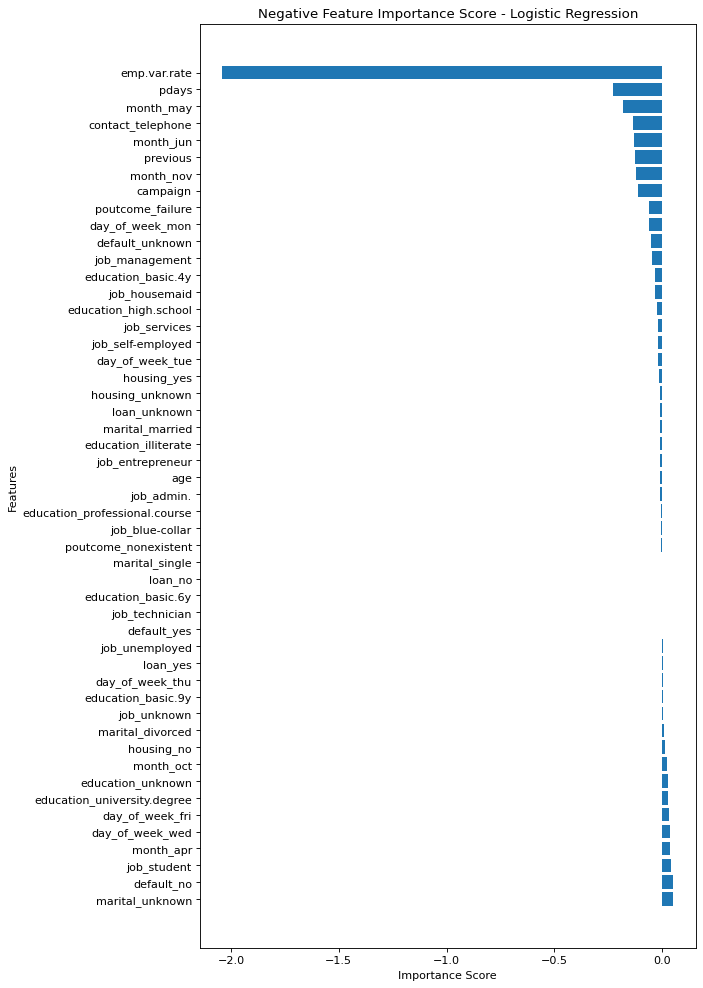

In [250]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [252]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.179492
euribor3m,0.178576
emp.var.rate,0.128020
cons.conf.idx,0.079699
poutcome_success,0.062927


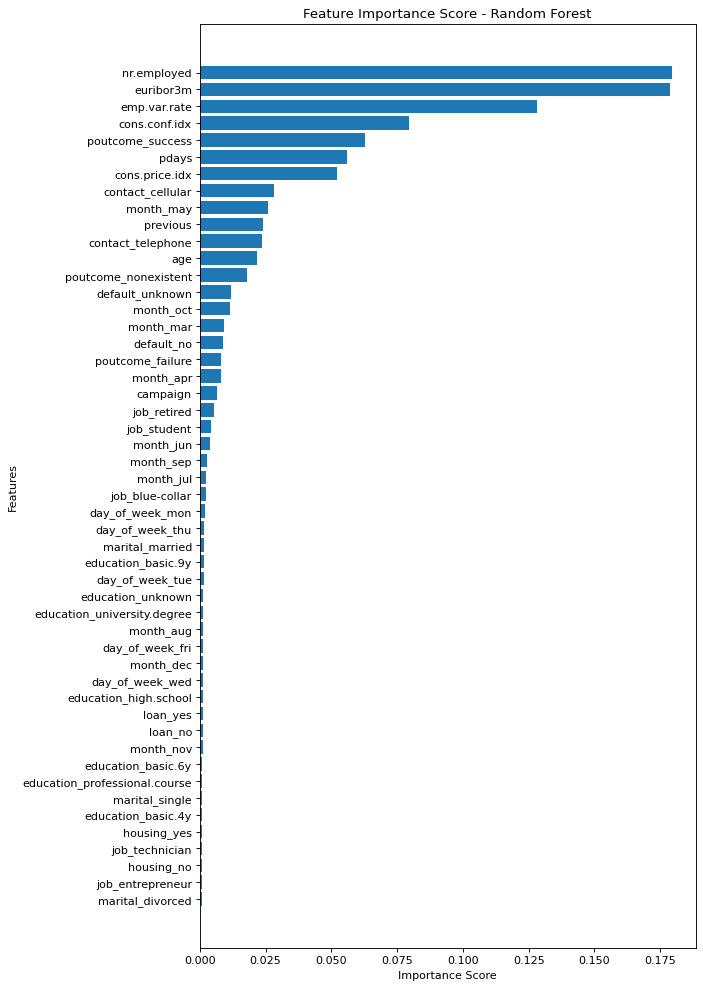

In [253]:
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

Gradient Boosting Classifier

In [254]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [255]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.425922
cons.conf.idx,0.132930
euribor3m,0.101748
age,0.062249
campaign,0.029272


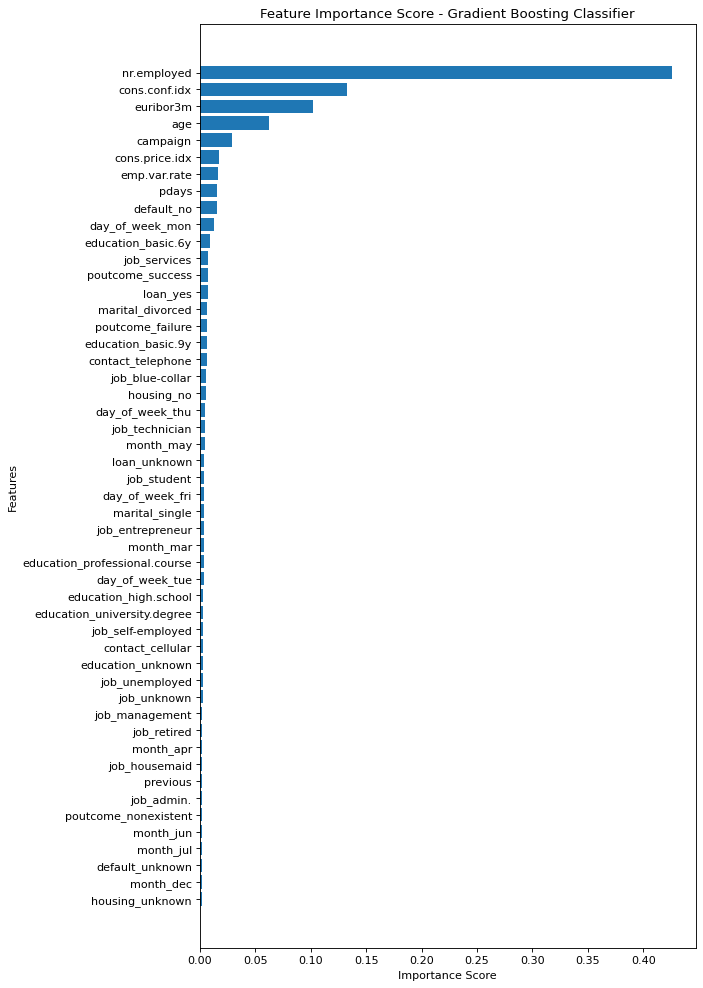

In [256]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [258]:
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.474196
cons.conf.idx,0.141049
euribor3m,0.061570
age,0.053487
campaign,0.032472


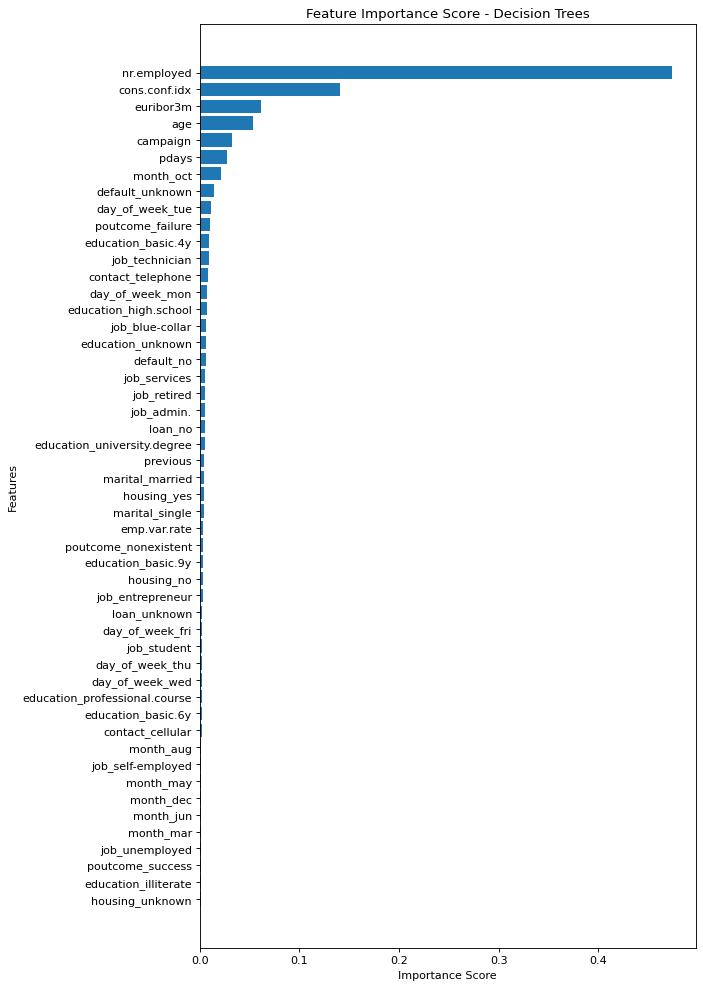

In [259]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

Hyperparameter tuning

A hyperparameter is a tool used in machine learning in order to estimate the model parameters (used in tuning a predictive modeling problem)

In [260]:
# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

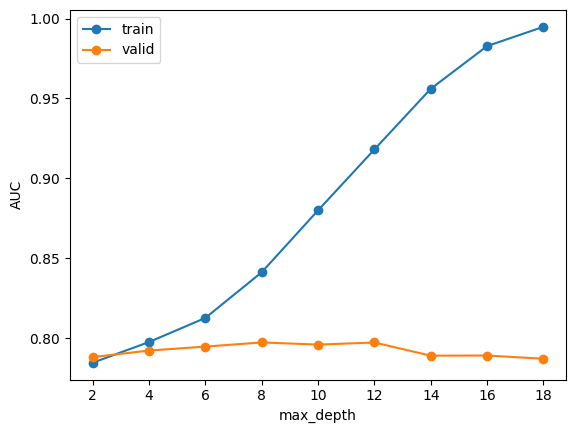

In [261]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [262]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [263]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [264]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 20, cv = 2,
                               scoring=auc_scoring,verbose = 1, random_state = 42)
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
108.45020055770874


See the best parameters

In [265]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [266]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.813
Validation AUC:0.795
Optimized Random Forest
Training AUC:0.843
Validation AUC:0.797


In [269]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [270]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

41.748879194259644


In [272]:
df_results

,classifier,data_set,auc,accuracy,recall,precision,specificity,f1
0,KNN,train,0.796956,0.734085,0.603832,0.816548,0.858158,0.694262
1,KNN,valid,0.779397,0.741059,0.600858,0.834990,0.878398,0.698835
2,LR,train,0.796603,0.744438,0.632880,0.814638,0.855995,0.712348
3,LR,valid,0.798059,0.747496,0.632332,0.821561,0.862661,0.714632
4,NB,train,0.771106,0.692522,0.491656,0.821798,0.893387,0.615236
5,NB,valid,0.779663,0.702432,0.496423,0.844282,0.908441,0.625225
6,DT,train,0.864211,0.784456,0.667800,0.871020,0.898640,0.755991
7,DT,valid,0.748045,0.719599,0.610873,0.780622,0.822604,0.685393
8,GB,train,0.899603,0.820457,0.765760,0.859820,0.875155,0.810069
9,GB,valid,0.777268,0.721030,0.683834,0.738794,0.758226,0.710253


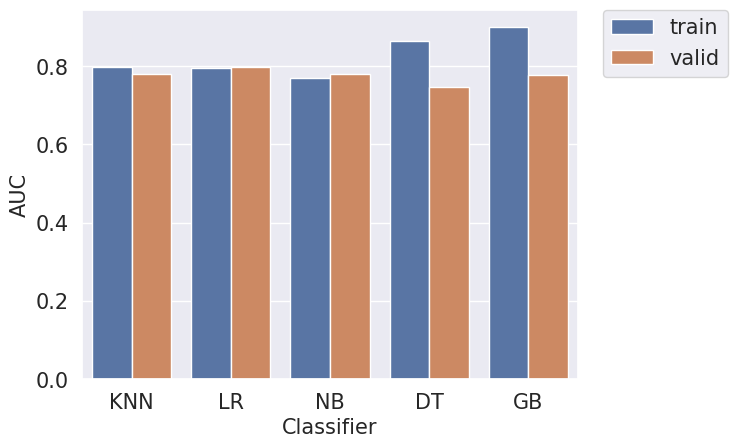

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

Picking the best model

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
# load the model, columns, mean values, and scaler
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [282]:
df_data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,1,-1.8,92.893,-46.2,5099.1,57,1.299,False,...,False,False,True,False,False,False,True,False,False,0
1,2,999,0,1.1,93.994,-36.4,5191.0,55,4.860,False,...,False,False,False,True,False,False,False,True,False,0
2,1,999,1,-1.8,92.893,-46.2,5099.1,33,1.313,False,...,False,True,False,False,False,False,True,False,False,0
3,4,999,0,1.4,94.465,-41.8,5228.1,36,4.967,True,...,False,True,False,False,False,False,False,True,False,0
4,2,999,0,1.4,93.918,-42.7,5228.1,27,4.963,False,...,False,True,False,False,False,False,False,True,False,0


Conclusion
Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. The model's performance is 79.5%.

A precision of 0.82 divided by a prevalence of 0.50 gives us 1.6, which means that the machine learning model helps us 1.6 times better than randomly guessing. The model was able to catch 62% of customers that will subscribe to a term deposit.

We should focus on targeting customers with high cons.price.idx (consumer price index) and euribor3m (3 month indicator for paying off loans) as they are high importance features for the model and business.